In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')

In [4]:
text_df = df.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet','Sentiment'], axis=1)
text_df.head()

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."


In [5]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

What are we drinking today @TucanTribe 
@MadBears_ 
@lkinc_algo 
@al_goanna 

#WorldCup2022 https://t.co/Oga3TzvG5h 

Amazing @CanadaSoccerEN  #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986.  Can’t wait to see these boys in action!

This is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8 

Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU 

Golden Maknae shinning bright

https://t.co/4AyZbzGTX4
#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK 
@BTS_twt 

If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k 



In [6]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [7]:
text_df.Tweet = text_df['Tweet'].apply(data_processing)

In [8]:
text_df = text_df.drop_duplicates('Tweet')

In [9]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [10]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: stemming(x))

In [11]:
text_df.head()

,Tweet
0,drinking today tucantribe madbears_ lkinc_algo...
1,amazing canadasocceren worldcup2022 launch vid...
2,worth reading watching worldcup2022
3,golden maknae shinning bright jeonjungkook jun...
4,bbc cares much human rights homosexual rights ...


In [12]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

drinking today tucantribe madbears_ lkinc_algo al_goanna worldcup2022 

amazing canadasocceren worldcup2022 launch video shows much face canada mens national team changed since last world cup entry 1986 cant wait see boys action canada fifa world cup opening video 

worth reading watching worldcup2022 

golden maknae shinning bright jeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 worldcup2022 fifakook bts_twt 

bbc cares much human rights homosexual rights women rights say opening ceremony saying opening ceremony bbc censor worldcup2022 opening ceremony 



In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)

In [15]:
text_df.head(5)

,Tweet,polarity
0,drinking today tucantribe madbears_ lkinc_algo...,0.000
1,amazing canadasocceren worldcup2022 launch vid...,0.225
2,worth reading watching worldcup2022,0.300
3,golden maknae shinning bright jeonjungkook jun...,0.500
4,bbc cares much human rights homosexual rights ...,0.000


In [16]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [17]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [18]:
text_df.head()

,Tweet,polarity,sentiment
0,drinking today tucantribe madbears_ lkinc_algo...,0.000,Neutral
1,amazing canadasocceren worldcup2022 launch vid...,0.225,Positive
2,worth reading watching worldcup2022,0.300,Positive
3,golden maknae shinning bright jeonjungkook jun...,0.500,Positive
4,bbc cares much human rights homosexual rights ...,0.000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

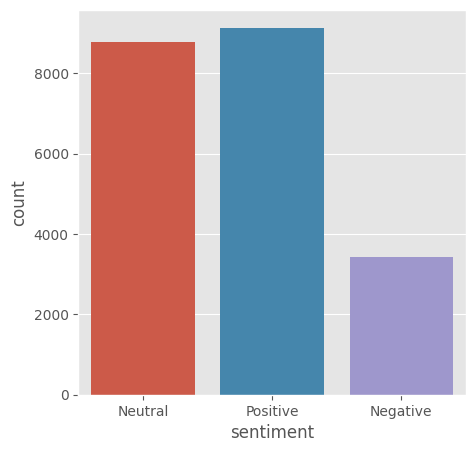

In [19]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

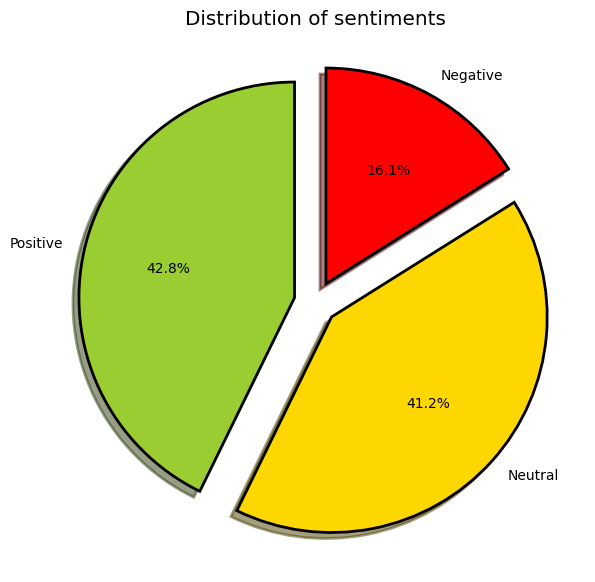

In [20]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(text_df['Tweet'], text_df['sentiment'], test_size = 0.2)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tf = TfidfVectorizer()
tf.fit(X_train)
x_train = tf.transform(X_train)
x_test = tf.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.67%


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 439  162   95]
 [   7 1731   29]
 [  27  121 1658]]


              precision    recall  f1-score   support

    Negative       0.93      0.63      0.75       696
     Neutral       0.86      0.98      0.92      1767
    Positive       0.93      0.92      0.92      1806

    accuracy                           0.90      4269
   macro avg       0.91      0.84      0.86      4269
weighted avg       0.90      0.90      0.89      4269



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [30]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [31]:
y_pred = grid.predict(x_test)

In [32]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 92.69%


In [33]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 524  109   63]
 [   9 1731   27]
 [  29   75 1702]]


              precision    recall  f1-score   support

    Negative       0.93      0.75      0.83       696
     Neutral       0.90      0.98      0.94      1767
    Positive       0.95      0.94      0.95      1806

    accuracy                           0.93      4269
   macro avg       0.93      0.89      0.91      4269
weighted avg       0.93      0.93      0.93      4269



In [34]:
from sklearn.svm import LinearSVC

In [35]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [36]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 93.28%


In [37]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 551   85   60]
 [   8 1726   33]
 [  30   71 1705]]


              precision    recall  f1-score   support

    Negative       0.94      0.79      0.86       696
     Neutral       0.92      0.98      0.95      1767
    Positive       0.95      0.94      0.95      1806

    accuracy                           0.93      4269
   macro avg       0.93      0.90      0.92      4269
weighted avg       0.93      0.93      0.93      4269



In [74]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [75]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [76]:
y_pred = grid.predict(x_test)

In [81]:
grid_pred = SVCmodel.predict(x_test)
grid_acc = accuracy_score(grid_pred, y_test)
print("test accuracy: {:.2f}%".format(grid_acc*100))

test accuracy: 93.28%


In [83]:
print(confusion_matrix(y_test, grid_pred))
print("\n")
print(classification_report(y_test, grid_pred))

[[ 551   85   60]
 [   8 1726   33]
 [  30   71 1705]]


              precision    recall  f1-score   support

    Negative       0.94      0.79      0.86       696
     Neutral       0.92      0.98      0.95      1767
    Positive       0.95      0.94      0.95      1806

    accuracy                           0.93      4269
   macro avg       0.93      0.90      0.92      4269
weighted avg       0.93      0.93      0.93      4269



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfcl= RandomForestClassifier()
rfcl.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
rfcl_pred = rfcl.predict(x_test)
rfcl_acc = accuracy_score(rfcl_pred, y_test)
print("test accuracy: {:.2f}%".format(rfcl_acc*100))

test accuracy: 88.43%


In [46]:
print(confusion_matrix(y_test, rfcl_pred))
print("\n")
print(classification_report(y_test, rfcl_pred))

[[ 414  151  131]
 [   6 1724   37]
 [  27  142 1637]]


              precision    recall  f1-score   support

    Negative       0.93      0.59      0.72       696
     Neutral       0.85      0.98      0.91      1767
    Positive       0.91      0.91      0.91      1806

    accuracy                           0.88      4269
   macro avg       0.90      0.83      0.85      4269
weighted avg       0.89      0.88      0.88      4269



In [47]:
from sklearn.naive_bayes import BernoulliNB

In [48]:
NB= BernoulliNB()
NB.fit(x_train, y_train)

BernoulliNB()

In [49]:
NB_pred = NB.predict(x_test)
NB_acc = accuracy_score(NB_pred, y_test)
print("test accuracy: {:.2f}%".format(NB_acc*100))

test accuracy: 77.63%


In [50]:
print(confusion_matrix(y_test, NB_pred))
print("\n")
print(classification_report(y_test, NB_pred))

[[ 144  271  281]
 [  18 1605  144]
 [  30  211 1565]]


              precision    recall  f1-score   support

    Negative       0.75      0.21      0.32       696
     Neutral       0.77      0.91      0.83      1767
    Positive       0.79      0.87      0.82      1806

    accuracy                           0.78      4269
   macro avg       0.77      0.66      0.66      4269
weighted avg       0.77      0.78      0.75      4269



In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
NB= MultinomialNB()
NB.fit(x_train, y_train)

MultinomialNB()

In [53]:
NB_pred = NB.predict(x_test)
NB_acc = accuracy_score(NB_pred, y_test)
print("test accuracy: {:.2f}%".format(NB_acc*100))

test accuracy: 71.19%


In [54]:
print(confusion_matrix(y_test, NB_pred))
print("\n")
print(classification_report(y_test, NB_pred))

[[  81  150  465]
 [   1 1211  555]
 [   1   58 1747]]


              precision    recall  f1-score   support

    Negative       0.98      0.12      0.21       696
     Neutral       0.85      0.69      0.76      1767
    Positive       0.63      0.97      0.76      1806

    accuracy                           0.71      4269
   macro avg       0.82      0.59      0.58      4269
weighted avg       0.78      0.71      0.67      4269



In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
model_pred = model.predict(x_test)
model_acc = accuracy_score(model_pred, y_test)
print("test accuracy: {:.2f}%".format(model_acc*100))

test accuracy: 88.33%


In [58]:
print(confusion_matrix(y_test, model_pred))
print("\n")
print(classification_report(y_test, model_pred))

[[ 472  110  114]
 [  31 1696   40]
 [  95  108 1603]]


              precision    recall  f1-score   support

    Negative       0.79      0.68      0.73       696
     Neutral       0.89      0.96      0.92      1767
    Positive       0.91      0.89      0.90      1806

    accuracy                           0.88      4269
   macro avg       0.86      0.84      0.85      4269
weighted avg       0.88      0.88      0.88      4269



In [59]:
from sklearn.neighbors import KNeighborsClassifier 

In [60]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("test accuracy: {:.2f}%".format(knn_acc*100))

test accuracy: 62.97%


In [62]:
print(confusion_matrix(y_test, knn_pred))
print("\n")
print(classification_report(y_test, knn_pred))

[[ 265  361   70]
 [  56 1529  182]
 [  86  826  894]]


              precision    recall  f1-score   support

    Negative       0.65      0.38      0.48       696
     Neutral       0.56      0.87      0.68      1767
    Positive       0.78      0.50      0.61      1806

    accuracy                           0.63      4269
   macro avg       0.66      0.58      0.59      4269
weighted avg       0.67      0.63      0.62      4269



In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [65]:
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 89.32%


In [66]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 442  165   89]
 [   6 1741   20]
 [  32  144 1630]]


              precision    recall  f1-score   support

    Negative       0.92      0.64      0.75       696
     Neutral       0.85      0.99      0.91      1767
    Positive       0.94      0.90      0.92      1806

    accuracy                           0.89      4269
   macro avg       0.90      0.84      0.86      4269
weighted avg       0.90      0.89      0.89      4269

